# PREDICTING A PULSAR STAR

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter . Neutron stars are very dense, and have short, regular rotational periods. This produces a very precise interval between pulses that ranges from milliseconds to seconds for an individual pulsar. Pulsars are believed to be one of the candidates for the source of ultra-high-energy cosmic rays.

In this kernel, I will predict whether a star is a pulsar star with different machine learning algorithms(LogisticRegression,GaussianNB,KNeighborsClassifier and Suport Vector Machine).

In [81]:
#Importing the require library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [82]:
#Import the dataset
df_data=pd.read_csv("HTRU_2.csv")
df_data.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [83]:
#Assigning name to the column
df_data.columns=["Mean of IP","STD of IP","Excess kurtosis of the IP","Skewness of the IP","Mean of the DM-SNR curve","STD of the DM-SNR CURVE","EXCESS Kurtosis of the DM_SNR curve","Skewness of the DM-SNR curve","target_class"]
df_data.columns

Index(['Mean of IP', 'STD of IP', 'Excess kurtosis of the IP',
       'Skewness of the IP', 'Mean of the DM-SNR curve',
       'STD of the DM-SNR CURVE', 'EXCESS Kurtosis of the DM_SNR curve',
       'Skewness of the DM-SNR curve', 'target_class'],
      dtype='object')

In [84]:
#Data descrition
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Mean of IP                           17897 non-null  float64
 1   STD of IP                            17897 non-null  float64
 2   Excess kurtosis of the IP            17897 non-null  float64
 3   Skewness of the IP                   17897 non-null  float64
 4   Mean of the DM-SNR curve             17897 non-null  float64
 5   STD of the DM-SNR CURVE              17897 non-null  float64
 6   EXCESS Kurtosis of the DM_SNR curve  17897 non-null  float64
 7   Skewness of the DM-SNR curve         17897 non-null  float64
 8   target_class                         17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [85]:
df_data.shape

(17897, 9)

In [86]:
df_data.head()

,Mean of IP,STD of IP,Excess kurtosis of the IP,Skewness of the IP,Mean of the DM-SNR curve,STD of the DM-SNR CURVE,EXCESS Kurtosis of the DM_SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is target_class variable. It is also the target variable.

In [87]:
# check distribution of target_class column

df_data['target_class'].value_counts()

0    16258
1     1639
Name: target_class, dtype: int64

In [88]:
# view the percentage distribution of target_class column

df_data['target_class'].value_counts()/np.float(len(df_data))

0    0.90842
1    0.09158
Name: target_class, dtype: float64

We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [89]:
# view summary of dataset

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Mean of IP                           17897 non-null  float64
 1   STD of IP                            17897 non-null  float64
 2   Excess kurtosis of the IP            17897 non-null  float64
 3   Skewness of the IP                   17897 non-null  float64
 4   Mean of the DM-SNR curve             17897 non-null  float64
 5   STD of the DM-SNR CURVE              17897 non-null  float64
 6   EXCESS Kurtosis of the DM_SNR curve  17897 non-null  float64
 7   Skewness of the DM-SNR curve         17897 non-null  float64
 8   target_class                         17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [90]:
df_data.isnull().sum()

Mean of IP                             0
STD of IP                              0
Excess kurtosis of the IP              0
Skewness of the IP                     0
Mean of the DM-SNR curve               0
STD of the DM-SNR CURVE                0
EXCESS Kurtosis of the DM_SNR curve    0
Skewness of the DM-SNR curve           0
target_class                           0
dtype: int64

We can see that there are no missing values in the dataset and all the variables are numerical variables.

# Outliers in numerical variables

In [91]:
# view summary statistics in numerical variables

round(df_data.describe(),2)

,Mean of IP,STD of IP,Excess kurtosis of the IP,Skewness of the IP,Mean of the DM-SNR curve,STD of the DM-SNR CURVE,EXCESS Kurtosis of the DM_SNR curve,Skewness of the DM-SNR curve,target_class
count,17897.00,17897.00,17897.00,17897.00,17897.00,17897.00,17897.00,17897.00,17897.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.52,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.07,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


On closer inspection, we can suspect that all the continuous variables may contain outliers.

I will draw boxplots to visualise outliers for the above variable.

Text(0, 0.5, 'Skewness of the DM-SNR curve')

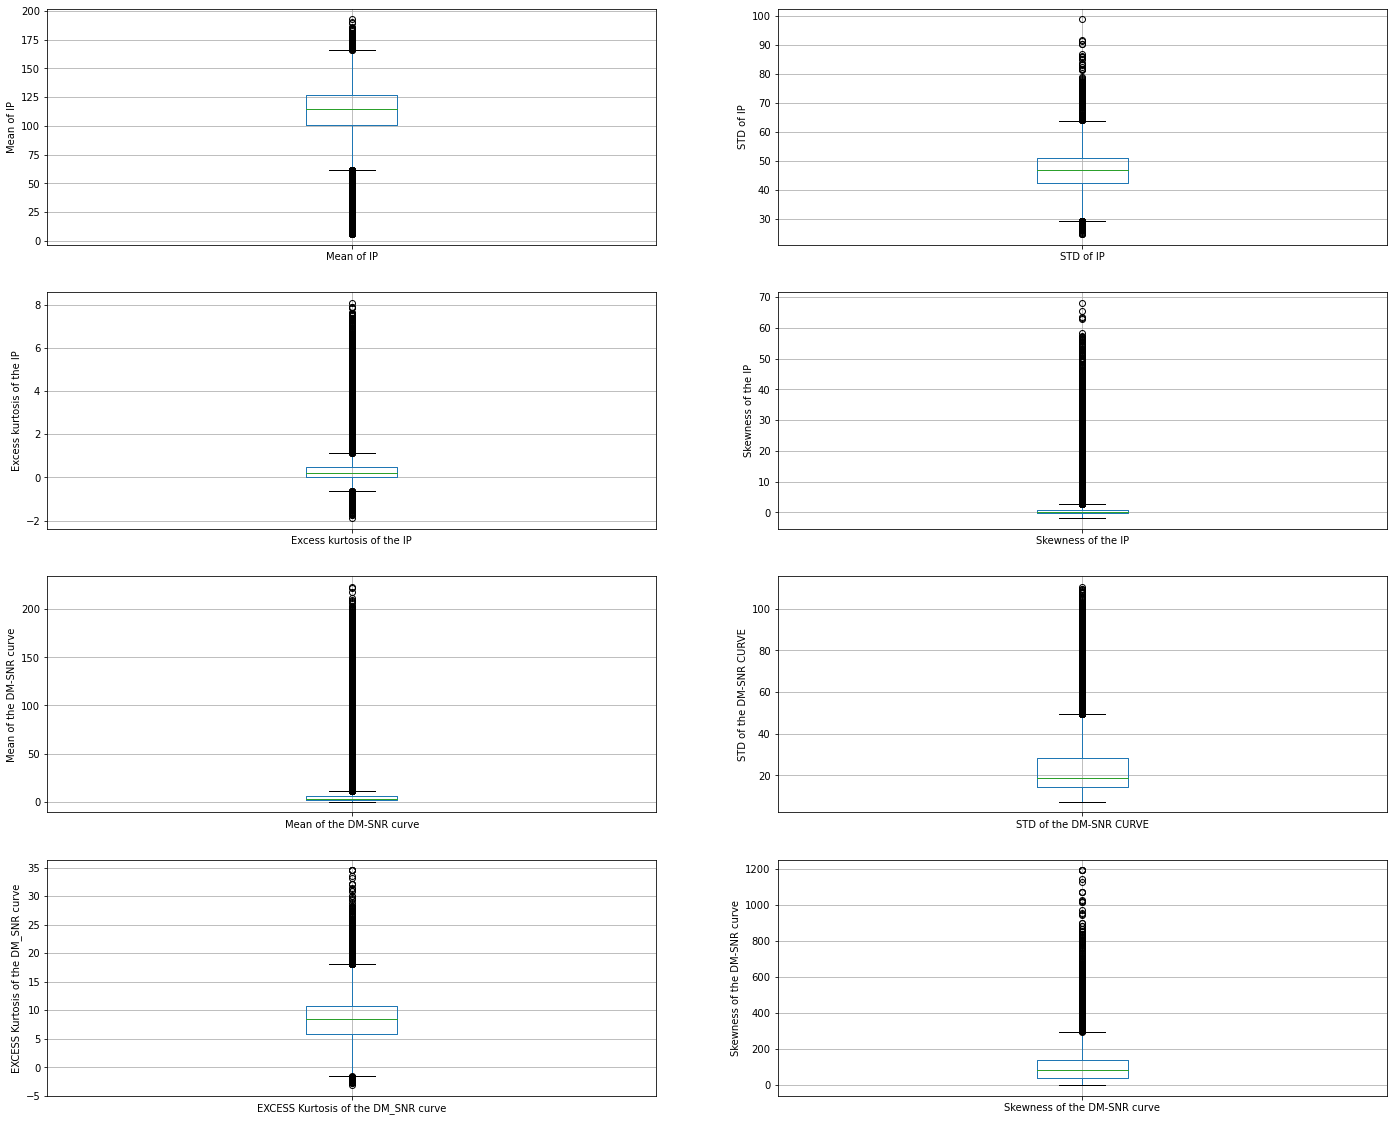

In [92]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df_data.boxplot(column='Mean of IP')
fig.set_title('')
fig.set_ylabel('Mean of IP')


plt.subplot(4, 2, 2)
fig = df_data.boxplot(column='STD of IP')
fig.set_title('')
fig.set_ylabel('STD of IP')


plt.subplot(4, 2, 3)
fig = df_data.boxplot(column='Excess kurtosis of the IP')
fig.set_title('')
fig.set_ylabel('Excess kurtosis of the IP')


plt.subplot(4, 2, 4)
fig = df_data.boxplot(column='Skewness of the IP')
fig.set_title('')
fig.set_ylabel('Skewness of the IP')


plt.subplot(4, 2, 5)
fig = df_data.boxplot(column='Mean of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Mean of the DM-SNR curve')

plt.subplot(4, 2, 6)
fig = df_data.boxplot(column='STD of the DM-SNR CURVE')
fig.set_title('')
fig.set_ylabel('STD of the DM-SNR CURVE')


plt.subplot(4, 2, 7)
fig = df_data.boxplot(column='EXCESS Kurtosis of the DM_SNR curve')
fig.set_title('')
fig.set_ylabel('EXCESS Kurtosis of the DM_SNR curve')


plt.subplot(4, 2, 8)
fig = df_data.boxplot(column='Skewness of the DM-SNR curve')
fig.set_title('')
fig.set_ylabel('Skewness of the DM-SNR curve')

The above boxplots confirm that there are lot of outliers

Text(0, 0.5, 'Number of pulsar stars')

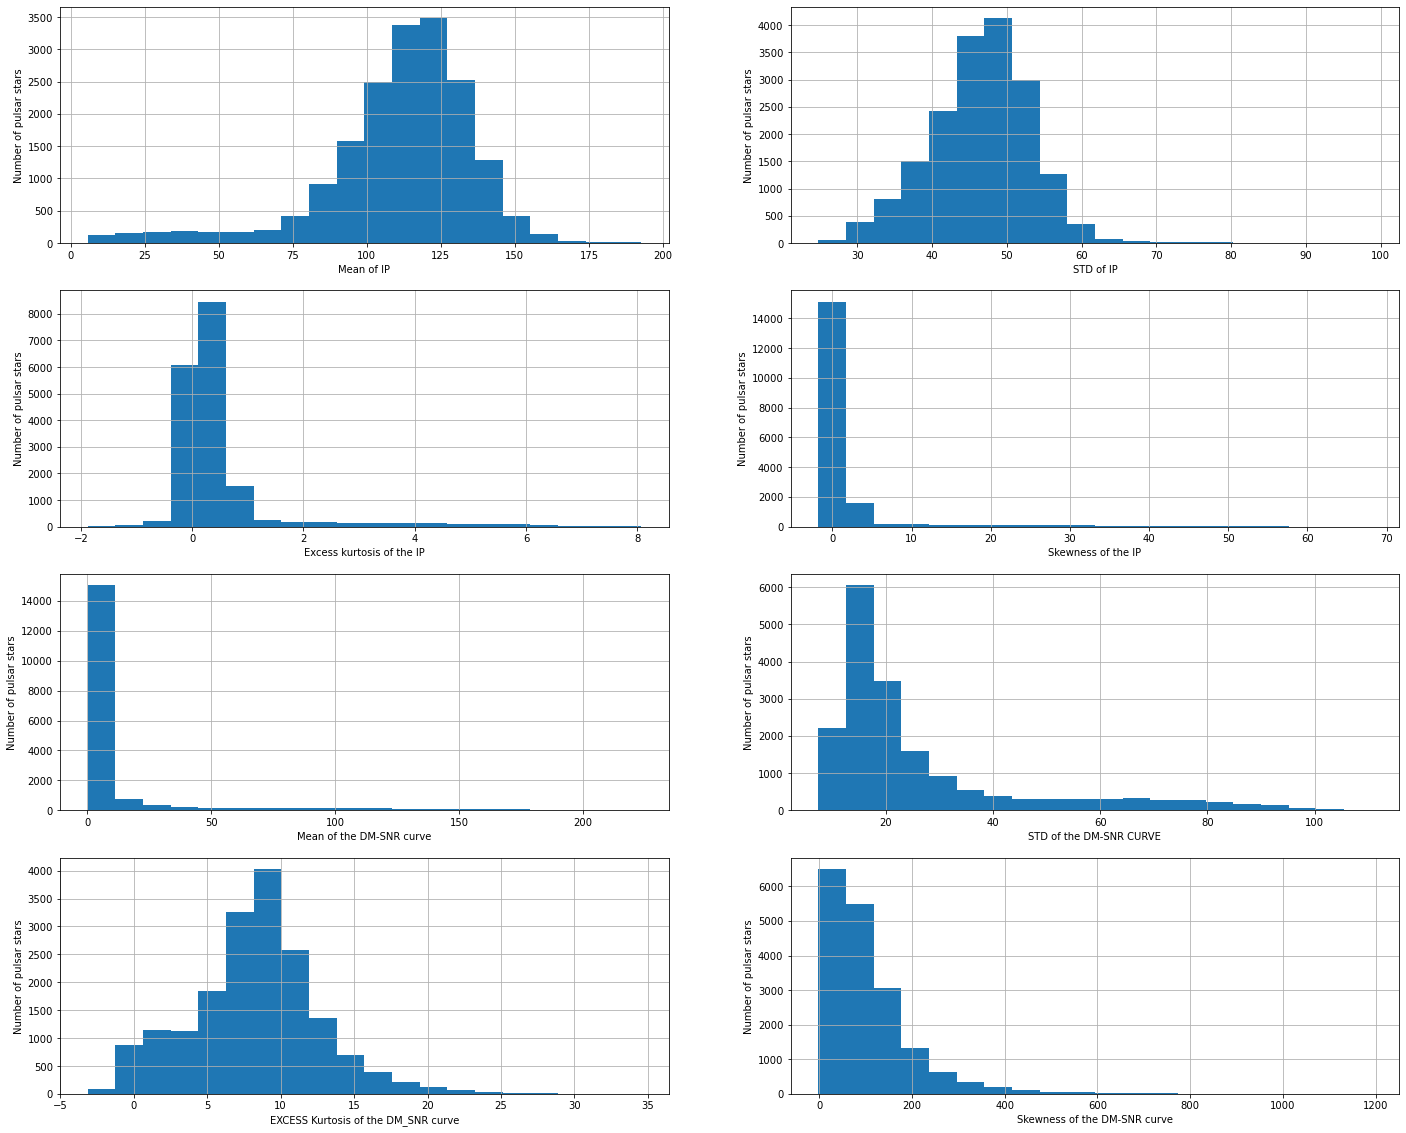

In [93]:
#Now, I will plot the histograms to check distributions to find out if they are normal or skewed.
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df_data["Mean of IP"].hist(bins=20)
fig.set_xlabel('Mean of IP')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df_data['STD of IP'].hist(bins=20)
fig.set_xlabel('STD of IP')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df_data['Excess kurtosis of the IP'].hist(bins=20)
fig.set_xlabel('Excess kurtosis of the IP')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df_data['Skewness of the IP'].hist(bins=20)
fig.set_xlabel('Skewness of the IP')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df_data["Mean of the DM-SNR curve"].hist(bins=20)
fig.set_xlabel('Mean of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df_data['STD of the DM-SNR CURVE'].hist(bins=20)
fig.set_xlabel('STD of the DM-SNR CURVE')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 7)
fig = df_data['EXCESS Kurtosis of the DM_SNR curve'].hist(bins=20)
fig.set_xlabel('EXCESS Kurtosis of the DM_SNR curve')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df_data['Skewness of the DM-SNR curve'].hist(bins=20)
fig.set_xlabel('Skewness of the DM-SNR curve')
fig.set_ylabel('Number of pulsar stars')

We can see that all the 8 continuous variables are skewed.

# Declare feature vector and target variable 

In [94]:
X = df_data.drop(['target_class'], axis=1)

y = df_data['target_class']

In [95]:
#Spliting the data into for model fitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [96]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14317, 8), (3580, 8))

# Feature Scaling 

In [97]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [98]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [99]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [100]:
X_train.describe()

,Mean of IP,STD of IP,Excess kurtosis of the IP,Skewness of the IP,Mean of the DM-SNR curve,STD of the DM-SNR CURVE,EXCESS Kurtosis of the DM_SNR curve,Skewness of the DM-SNR curve
count,1.431700e+04,1.431700e+04,1.431700e+04,1.431700e+04,1.431700e+04,1.431700e+04,1.431700e+04,1.431700e+04
mean,1.308197e-17,-3.185814e-16,-3.030489e-17,5.118797e-17,-1.645522e-17,5.341160e-17,5.208750e-17,-8.754919e-18
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.072767e+00,-3.170722e+00,-2.203374e+00,-5.777289e-01,-4.214850e-01,-9.726198e-01,-2.538846e+00,-1.006208e+00
25%,-3.929717e-01,-6.147909e-01,-4.248982e-01,-3.196470e-01,-3.639005e-01,-6.104646e-01,-5.670462e-01,-6.619621e-01
50%,1.569246e-01,6.122118e-02,-2.423845e-01,-2.566054e-01,-3.343461e-01,-4.053591e-01,2.991320e-02,-2.050877e-01
75%,6.290424e-01,6.539127e-01,-5.210490e-03,-1.374950e-01,-2.429448e-01,1.109600e-01,5.356614e-01,3.284876e-01
max,3.163650e+00,7.623202e+00,7.081486e+00,1.067049e+01,7.113110e+00,4.316887e+00,5.821428e+00,1.022166e+01


In [101]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_prediction = model.predict(X_test)
#Printing the Accuracy Score
print(accuracy_score(y_test,y_prediction))

0.9807262569832402


In [102]:
#printing the MMSE
print(mean_squared_error(y_test,y_prediction))


0.019273743016759777


In [135]:
#print the confusion matrix
print(confusion_matrix(y_test,y_prediction))

[[3257   20]
 [  49  254]]


In [103]:
#print the Classification Report
print(classification_report(y_test,lr_prediction))

[[3257   20]
 [  49  254]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3277
           1       0.93      0.84      0.88       303

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



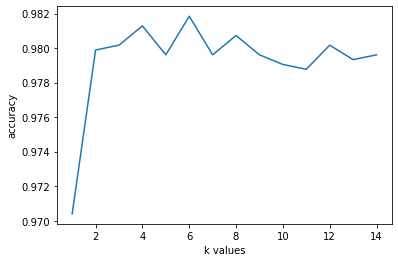

In [104]:
#Implementing K-NEAREST NEIGHBOUR(KNN) CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =13) # n_neighbors = k
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [105]:
#Printing the Accuracy Score
print(accuracy_score(y_test,knn_prediction))

0.9793296089385475


In [106]:
#print the confusion matrix
print(confusion_matrix(y_test,knn_prediction))


[[3255   22]
 [  52  251]]


In [107]:
#print the Classification Report
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3277
           1       0.92      0.83      0.87       303

    accuracy                           0.98      3580
   macro avg       0.95      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [108]:
#Implementing NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb=nb.predict(X_test)

In [109]:
print(accuracy_score(y_test,prediction_nb))

0.9497206703910615


In [110]:
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3277
           1       0.66      0.85      0.74       303

    accuracy                           0.95      3580
   macro avg       0.82      0.91      0.86      3580
weighted avg       0.96      0.95      0.95      3580



In [111]:
print(confusion_matrix(y_test,prediction_nb))

[[3141  136]
 [  44  259]]


# Implementing SVM with default hyperparameters 


Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [112]:


# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9799


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0

In [117]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9799


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

In [118]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9782


In this case, we can see that the accuracy had decreased with C=1000.0

# Implement SVM with linear kernel and C=1.0

In [114]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9799


In [115]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9807


In [119]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9807


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

# Validate the performance of SVM Model

In [121]:
#Check for overfitting and underfitting
print('Train accuracy {}'.format(linear_svc.score(X_train, y_train)))
print('Test accuracy  {}'.format(linear_svc.score(X_test, y_test)))

Train accuracy 0.9790458895019907
Test accuracy  0.9798882681564246


The training-set accuracy score is 0.9790 while the test-set accuracy to be 0.9799. These two values are quite comparable. So, there is no question of overfitting.

​

# Implementing SVM with polynomial kernel

In [122]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9793


In [124]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9793


Polynomial kernel gives poor performance. It may be overfitting the training set.

# implementing SVM with sigmoid kernel

In [125]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [126]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8860


We can see that sigmoid kernel is also performing poorly just like with polynomial kernel.

# Comments

We get maximum accuracy with rbf and linear kernel with C=100.0. and the accuracy is 0.9807. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

Such metric to analyze the model performance in imbalanced classes problem is Confusion matrix and Classification Report.

In [128]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)

In [130]:
#Printing the confusion Matrix
model=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n', model)

print('\nTrue Positives(TP) = ', model[0,0])

print('\nTrue Negatives(TN) = ', model[1,1])

print('\nFalse Positives(FP) = ', model[0,1])

print('\nFalse Negatives(FN) = ', model[1,0])

Confusion matrix

 [[3257   20]
 [  49  254]]

True Positives(TP) =  3257

True Negatives(TN) =  254

False Positives(FP) =  20

False Negatives(FN) =  49


The confusion matrix shows 3257 + 254 = 3511 correct predictions and 20 + 49 = 69 incorrect predictions

<AxesSubplot:>

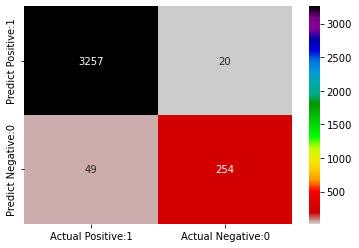

In [133]:
# visualize confusion matrix with seaborn heatmap

model_graph= pd.DataFrame(data=model, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(model_graph, annot=True, fmt='d', cmap='nipy_spectral_r')

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3277
           1       0.93      0.84      0.88       303

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580

